Simulation stopped at time t = 1.06 because x reached -0.0128


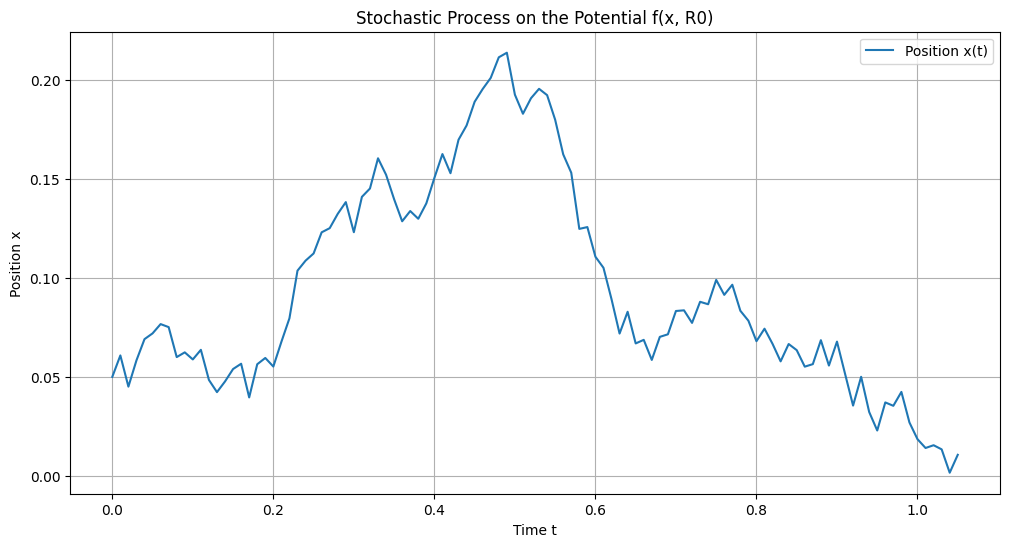

Mean of fluctuations: 6.807971377418413e-18
Standard deviation of fluctuations: 0.05247620623040856


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R0 = 1.5          # Control parameter R0 > 1
sigma = 0.1       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 100            # Total time
N = int(T / dt)   # Maximum number of time steps

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**2 )

# Initialize the system at the fixed point x = R0 - 1
x = []
x.append(0.05)

# Time array for plotting
time = [0]

# Simulate the stochastic process using Euler-Maruyama method
for i in range(1, N):
    deterministic = force(x[-1], R0) * dt
    stochastic = sigma * np.sqrt(dt) * np.random.normal()
    x_new = x[-1] + deterministic + stochastic

    # Check if x hits 0 or goes below
    if x_new <= 0:
        print(f"Simulation stopped at time t = {i * dt:.2f} because x reached {x_new:.4f}")
        break

    x.append(x_new)
    time.append(i * dt)

# Convert lists to numpy arrays for plotting
x = np.array(x)
time = np.array(time)

# Calculate fluctuations (deviations from the mean position)
fluctuations = x - np.mean(x)

# Plot the position over time
plt.figure(figsize=(12, 6))
plt.plot(time, x, label='Position x(t)')
plt.xlabel('Time t')
plt.ylabel('Position x')
plt.title('Stochastic Process on the Potential f(x, R0)')
plt.legend()
plt.grid(True)
plt.show()


# Calculate and display statistics of the fluctuations
mean_fluctuation = np.mean(fluctuations)
std_fluctuation = np.std(fluctuations)
print(f"Mean of fluctuations: {mean_fluctuation}")
print(f"Standard deviation of fluctuations: {std_fluctuation}")


Simulation 1 reached the maximum time without hitting x <= 0
Simulation 2 stopped at time t = 0.14 because x reached -0.0041
Simulation 3 reached the maximum time without hitting x <= 0
Simulation 4 stopped at time t = 0.01 because x reached -0.0001
Simulation 5 stopped at time t = 0.25 because x reached -0.0039
Simulation 6 stopped at time t = 0.09 because x reached -0.0061
Simulation 7 stopped at time t = 0.03 because x reached -0.0064
Simulation 8 stopped at time t = 1.66 because x reached -0.0116
Simulation 9 stopped at time t = 0.06 because x reached -0.0067
Simulation 10 stopped at time t = 0.03 because x reached -0.0024
Simulation 11 stopped at time t = 0.71 because x reached -0.0192
Simulation 12 stopped at time t = 0.46 because x reached -0.0085
Simulation 13 stopped at time t = 1.74 because x reached -0.0052
Simulation 14 stopped at time t = 0.03 because x reached -0.0069
Simulation 15 stopped at time t = 0.03 because x reached -0.0101
Simulation 16 stopped at time t = 0.07 b

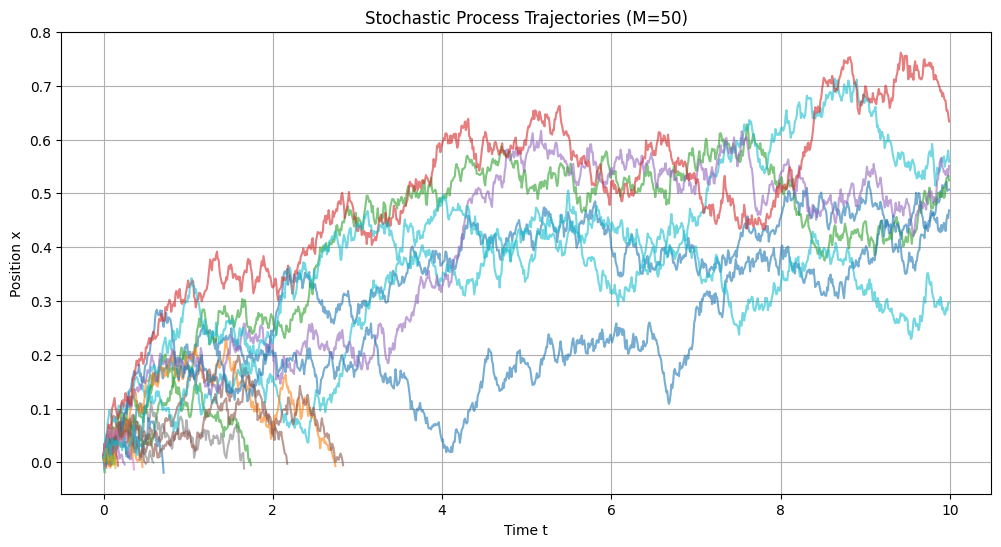

In [2]:
# Parameters
R0 = 1.5          # Control parameter R0 > 1
sigma = 0.1       # Standard deviation of the Gaussian noise
dt = 0.01         # Time step
T = 10            # Total time
N = int(T / dt)   # Maximum number of time steps
M = 50            # Number of simulations

# Potential function
def potential(x, R0):
    return -0.5 * (R0 - 1) * x**2 + (1/3) * x**3

# Force derived from the potential (negative gradient)
def force(x, R0):
    return -( - (R0 - 1) * x + x**2 )

# Initialize lists to store all trajectories
all_x = []    # List to store positions from all simulations
all_time = [] # List to store corresponding time arrays

# Simulate M stochastic processes
for sim in range(M):
    x = [0.01]  # Start at the fixed point x = R0 - 1
    time = [0]
    
    for i in range(1, N):
        deterministic = force(x[-1], R0) * dt
        stochastic = sigma * np.sqrt(dt) * np.random.normal()
        x_new = x[-1] + deterministic + stochastic

        # Check if x hits 0 or goes below
        if x_new <= 0:
            # Append the last position and time
            x.append(x_new)
            time.append(i * dt)
            print(f"Simulation {sim+1} stopped at time t = {i * dt:.2f} because x reached {x_new:.4f}")
            break

        x.append(x_new)
        time.append(i * dt)
    else:
        # If the loop didn't break, the simulation reached the maximum time
        print(f"Simulation {sim+1} reached the maximum time without hitting x <= 0")
    
    # Store the trajectory
    all_x.append(np.array(x))
    all_time.append(np.array(time))

# Plot all trajectories
plt.figure(figsize=(12, 6))
for i in range(M):
    plt.plot(all_time[i], all_x[i], label=f'Simulation {i+1}', alpha=0.6)

plt.xlabel('Time t')
plt.ylabel('Position x')
plt.title(f'Stochastic Process Trajectories (M={M})')
# If M is large, we might not want to show all labels
if M <= 10:
    plt.legend()
plt.grid(True)
plt.show()
